<a href="https://colab.research.google.com/github/momara04/hand_written_digit_recognition/blob/main/Hand_Written_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Definition and Dataset Loading / Exploration

In [ ]:
# Importing libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Loading the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Display dataset dimensions
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


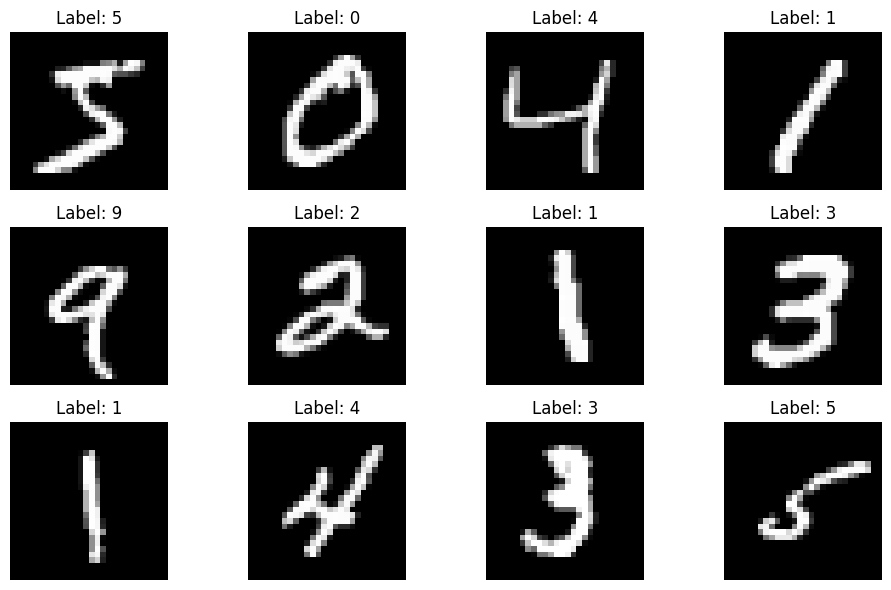

In [ ]:
# Visualizing a few images
plt.figure(figsize=(10, 6))
for i in range(12):  # Display 12 images
    plt.subplot(3, 4, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


Label Distribution in Training Set:
Digit 0: 5923 images
Digit 1: 6742 images
Digit 2: 5958 images
Digit 3: 6131 images
Digit 4: 5842 images
Digit 5: 5421 images
Digit 6: 5918 images
Digit 7: 6265 images
Digit 8: 5851 images
Digit 9: 5949 images


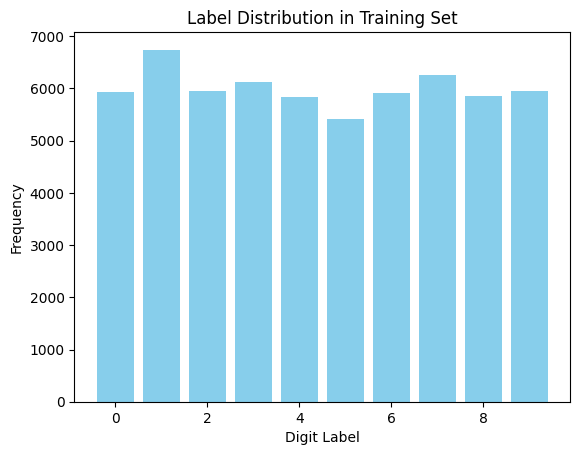

In [ ]:
# Count the frequency of each digit in the training set
unique, counts = np.unique(y_train, return_counts=True)
label_distribution = dict(zip(unique, counts))
print("Label Distribution in Training Set:")
for label, count in label_distribution.items():
    print(f"Digit {label}: {count} images")

# Visualize the distribution of labels
plt.bar(label_distribution.keys(), label_distribution.values(), color='skyblue')
plt.title('Label Distribution in Training Set')
plt.xlabel('Digit Label')
plt.ylabel('Frequency')
plt.show()


Pixel value range in training set: 0 to 255
Mean pixel value: 33.32
Standard deviation of pixel values: 78.57


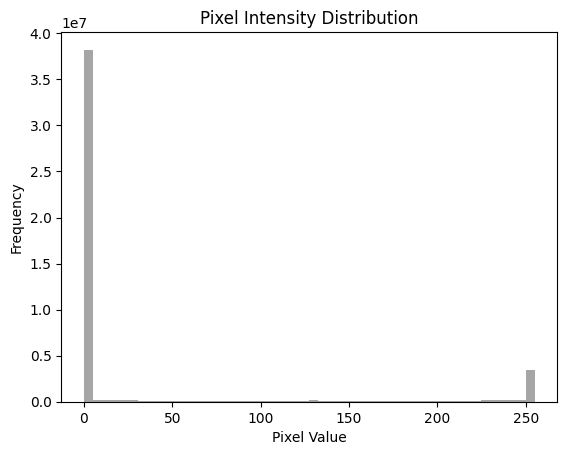

In [ ]:
# Calculate pixel statistics for training set
print(f"Pixel value range in training set: {X_train.min()} to {X_train.max()}")
print(f"Mean pixel value: {X_train.mean():.2f}")
print(f"Standard deviation of pixel values: {X_train.std():.2f}")

# Plot histogram of pixel values
plt.hist(X_train.ravel(), bins=50, color='gray', alpha=0.7)
plt.title('Pixel Intensity Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.show()


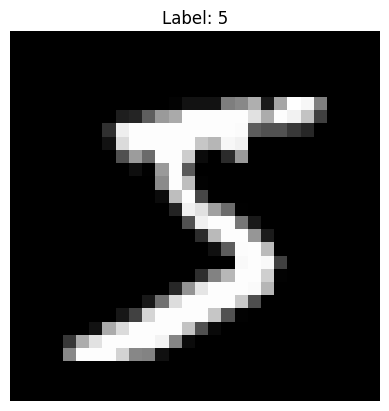

Pixel values for the selected image:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0  

In [ ]:
# Display a specific image and its pixel values
image_idx = 0  # Change this index to inspect different images
plt.imshow(X_train[image_idx], cmap='gray')
plt.title(f"Label: {y_train[image_idx]}")
plt.axis('off')
plt.show()

# Print pixel values
print("Pixel values for the selected image:")
print(X_train[image_idx])


In [ ]:
# Compare pixel value statistics between training and testing data
print(f"Training set - Mean pixel value: {X_train.mean():.2f}, Std: {X_train.std():.2f}")
print(f"Testing set - Mean pixel value: {X_test.mean():.2f}, Std: {X_test.std():.2f}")


Training set - Mean pixel value: 33.32, Std: 78.57
Testing set - Mean pixel value: 33.79, Std: 79.17


# Preprocessing the Data

In [ ]:
# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

print(f"After normalization: Min = {X_train.min()}, Max = {X_train.max()}")


NameError: name 'X_train' is not defined

In [ ]:
# Reshape the data to add a channel dimension
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

print(f"Training data shape after reshaping: {X_train.shape}")
print(f"Testing data shape after reshaping: {X_test.shape}")


Training data shape after reshaping: (60000, 28, 28, 1)
Testing data shape after reshaping: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Label shape after one-hot encoding: {y_train.shape}")


Label shape after one-hot encoding: (60000, 10)


# Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dropout(0.5),
    Dense(units=10, activation='softmax')
])

# Print the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation and Training

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("Model compiled successfully!")


Model compiled successfully!


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 31ms/step - accuracy: 0.8435 - loss: 0.4936 - val_accuracy: 0.9827 - val_loss: 0.0585
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 48s 32ms/step - accuracy: 0.9720 - loss: 0.0936 - val_accuracy: 0.9866 - val_loss: 0.0460
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9794 - loss: 0.0666 - val_accuracy: 0.9882 - val_loss: 0.0395
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 30ms/step - accuracy: 0.9833 - loss: 0.0527 - val_accuracy: 0.9890 - val_loss: 0.0365
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 85s 32ms/step - accuracy: 0.9866 - loss: 0.0430 - val_accuracy: 0.9883 - val_loss: 0.0406
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9892 - loss: 0.0344 - val_accuracy: 0.9897 - val_loss: 0.0396
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 30ms/step - accuracy: 0.9893 - loss: 0.0332 - val_accuracy: 0.9912 - val_loss: 0.0380
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 86s 32ms/step - accuracy: 0.9918 -

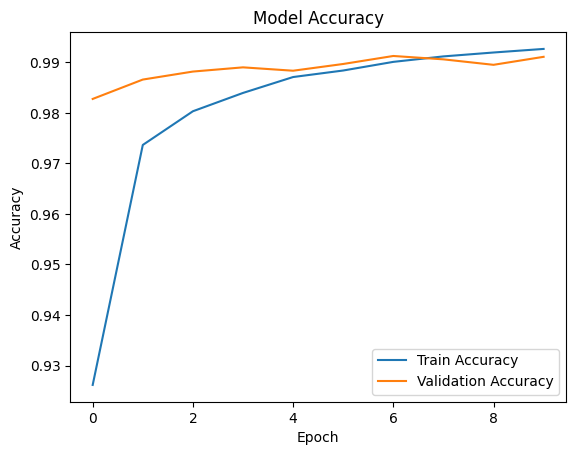

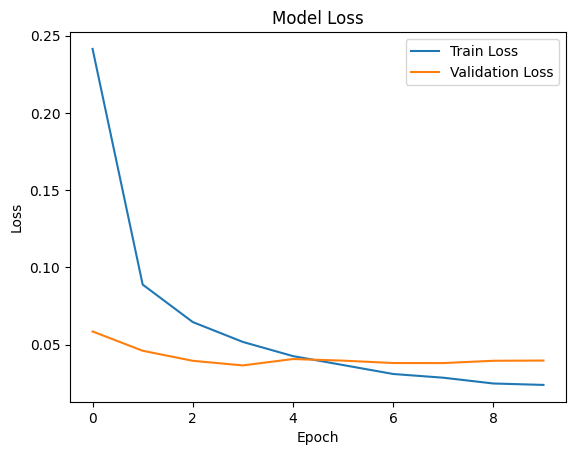

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,  # 20% of the training data for validation
    epochs=10,            # Number of epochs
    batch_size=32,        # Number of samples per batch
    verbose=1             # Display progress during training
)

# Visualize training history
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


# Model Evaluation

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"Test Loss: {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9894 - loss: 0.0353
Test Accuracy: 99.16%
Test Loss: 0.0288


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


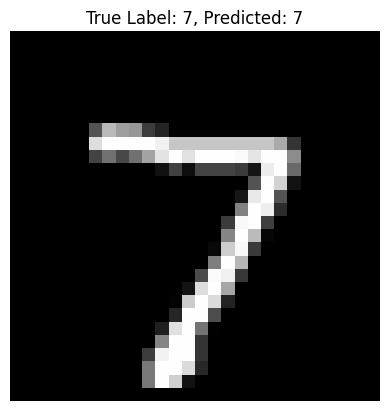

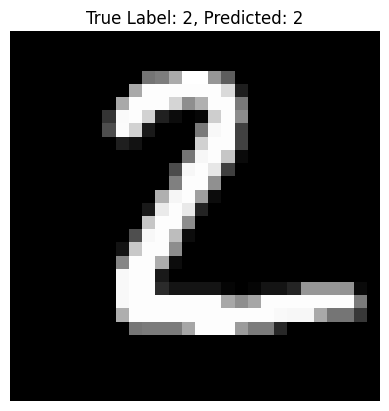

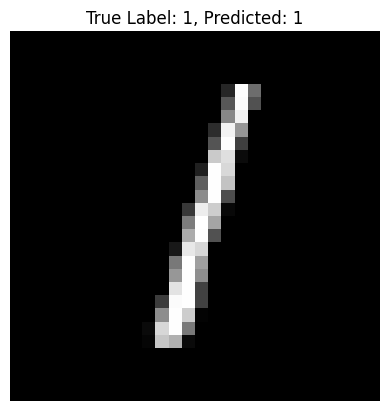

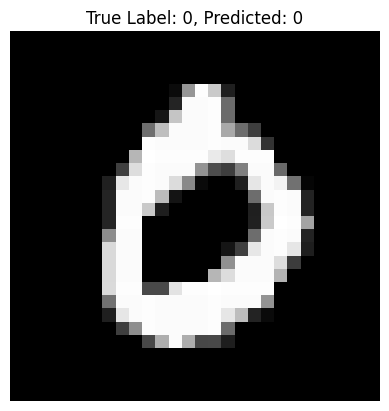

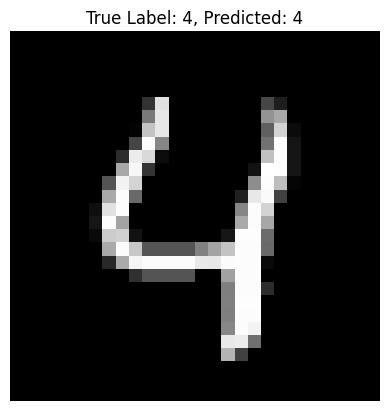

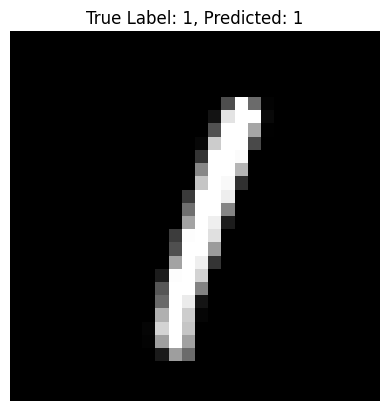

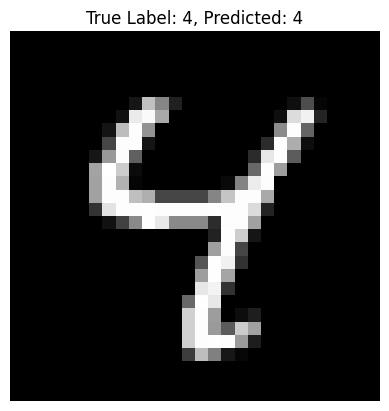

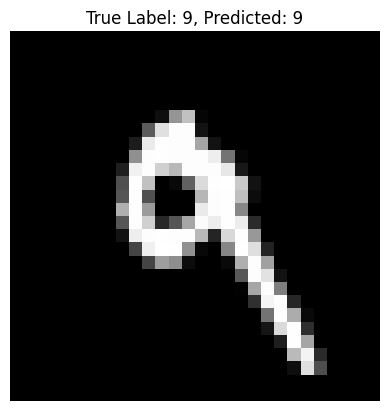

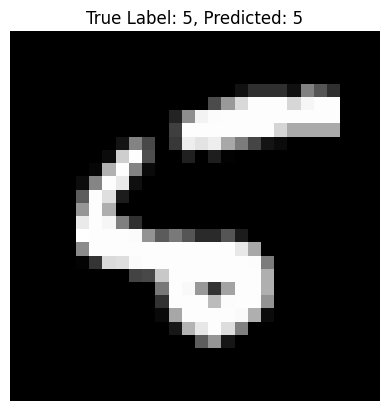

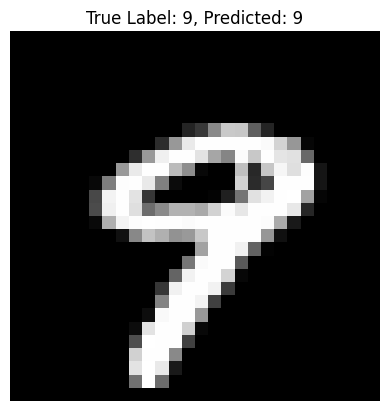

In [ ]:
# Make predictions
predictions = model.predict(X_test)

# Visualize predictions
import numpy as np
for i in range(10):
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True Label: {np.argmax(y_test[i])}, Predicted: {np.argmax(predictions[i])}")
    plt.axis('off')
    plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


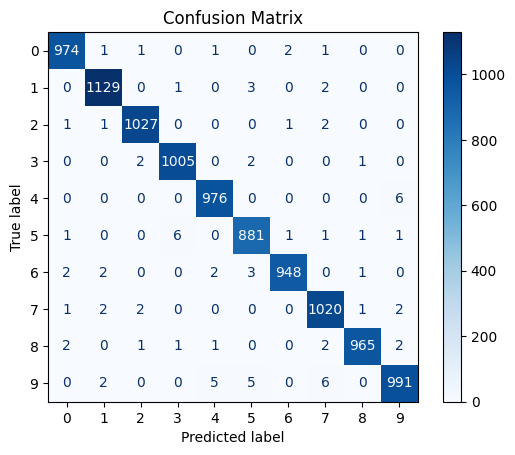

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Generate predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.arange(10))
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Generate classification report
report = classification_report(y_true, y_pred, target_names=[str(i) for i in range(10)])
print(report)


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



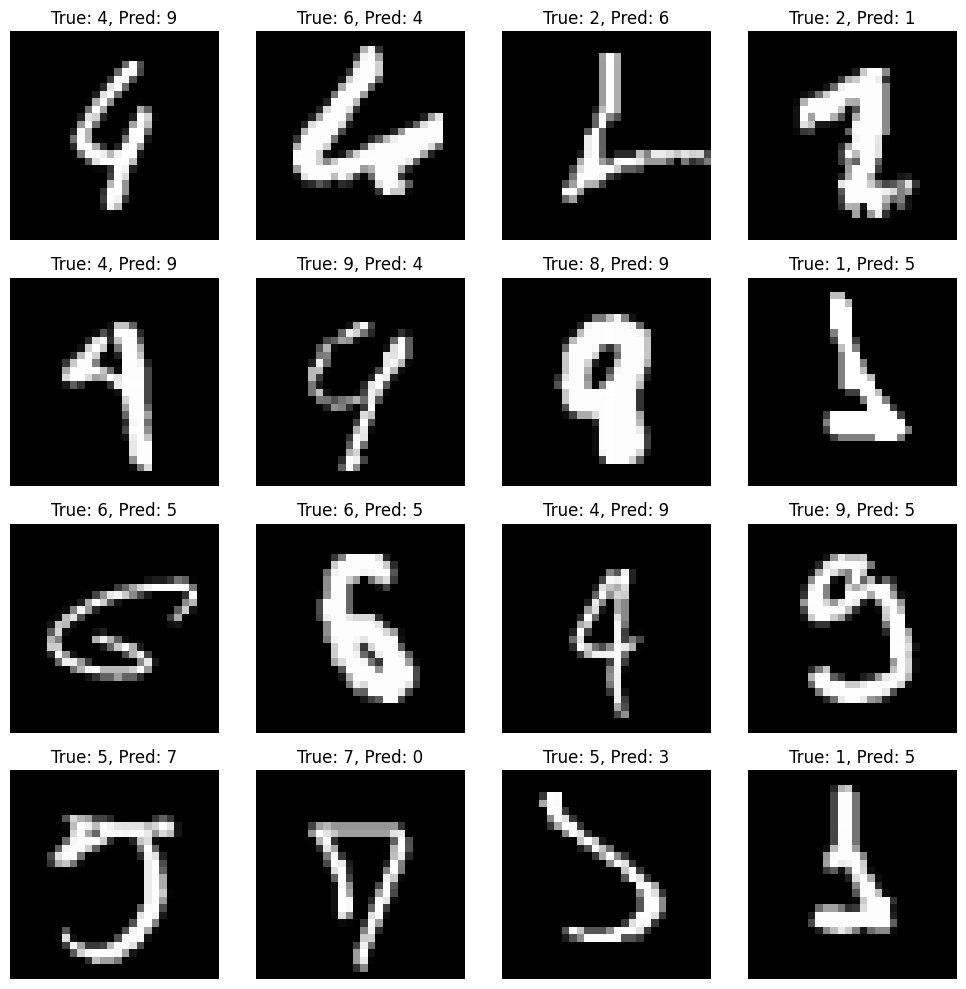

In [ ]:
# Find misclassified examples
misclassified_indices = np.where(y_true != y_pred)[0]

# Display some misclassified examples
plt.figure(figsize=(10, 10))
for i, idx in enumerate(misclassified_indices[:16]):  # Display the first 16 misclassified images
    plt.subplot(4, 4, i + 1)
    plt.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[idx]}, Pred: {y_pred[idx]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


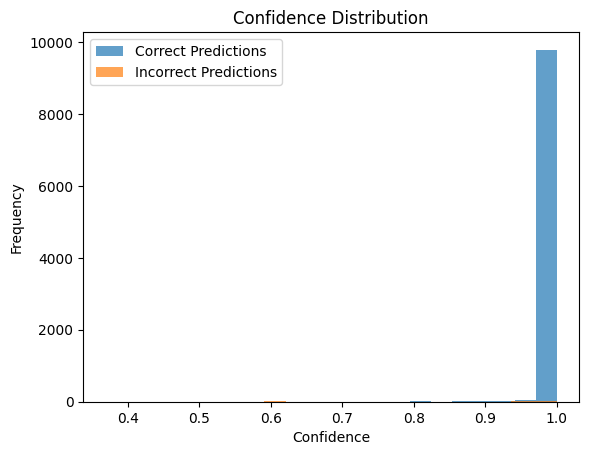

In [ ]:
# Get predicted probabilities
probs = model.predict(X_test)

# Separate probabilities for correct and incorrect predictions
correct_confidences = [probs[i, y_true[i]] for i in range(len(y_true)) if y_true[i] == y_pred[i]]
incorrect_confidences = [probs[i, y_pred[i]] for i in range(len(y_true)) if y_true[i] != y_pred[i]]

# Plot confidence distributions
plt.hist(correct_confidences, bins=20, alpha=0.7, label='Correct Predictions')
plt.hist(incorrect_confidences, bins=20, alpha=0.7, label='Incorrect Predictions')
plt.title('Confidence Distribution')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [ ]:
# Add random noise to test images
noise = np.random.normal(0, 0.1, X_test.shape)
X_test_noisy = np.clip(X_test + noise, 0, 1)  # Ensure pixel values remain in [0, 1]

# Evaluate the model on noisy test images
test_loss_noisy, test_accuracy_noisy = model.evaluate(X_test_noisy, y_test, verbose=1)
print(f"Test Accuracy on Noisy Images: {test_accuracy_noisy * 100:.2f}%")
print(f"Test Loss on Noisy Images: {test_loss_noisy:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9894 - loss: 0.0327
Test Accuracy on Noisy Images: 99.20%
Test Loss on Noisy Images: 0.0263


# Saving the Model

In [ ]:
model.save('mnist_cnn_model.h5')
print("Model saved as 'mnist_cnn_model.h5'.")


Model saved as 'mnist_cnn_model.h5'.


In [ ]:
from google.colab import files
files.download('mnist_cnn_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Deploying the Model

In [ ]:
import gradio as gr
import numpy as np
from tensorflow.keras.models import load_model
from PIL import ImageOps  # For inverting colors if needed
from PIL import Image

# Load the trained model
model = load_model('mnist_cnn_model.h5')

# Define a function for prediction
def predict_digit(image):
    # Ensure the image is a PIL Image object
    if not isinstance(image, Image.Image):
        image = Image.fromarray(image)  # Convert NumPy array to PIL Image if needed

    # Convert the image to grayscale and resize it to 28x28
    image = image.convert("L")  # Convert to grayscale
    image = ImageOps.invert(image)  # Invert colors (white digit on black background)
    image = image.resize((28, 28))  # Resize to 28x28
    image = np.array(image)  # Convert to numpy array

    # Preprocess the image
    image = image.reshape(1, 28, 28, 1)       # Reshape to model input shape
    image = image / 255.0                     # Normalize pixel values
    prediction = model.predict(image).argmax()  # Get the predicted class
    return f"Predicted Digit: {prediction}"


# Create a Gradio interface
interface = gr.Interface(
    fn=predict_digit,
    inputs=gr.Image(image_mode="L"),  # Grayscale input
    outputs="text",
    live=True,
    title="Handwritten Digit Recognition",
    description="Draw a digit (0-9) on the canvas, and the model will predict it."
)

# Launch the app
interface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://4e0b1968bacb57f0fa.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
